In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Data Loading & Initial Inspection

In [ ]:
file_path = '/content/drive/MyDrive/data.csv'
df = pd.read_csv(file_path)

In [ ]:
print("Shape:", df.shape)


Shape: (4600, 18)


In [ ]:
print(df.dtypes)

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


In [ ]:
print(df.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [ ]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
# Quick summary statistics
print("\nSummary statistics:\n", df.describe())


Summary statistics:
               price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   86

### Exploratory Data Analysis (EDA)

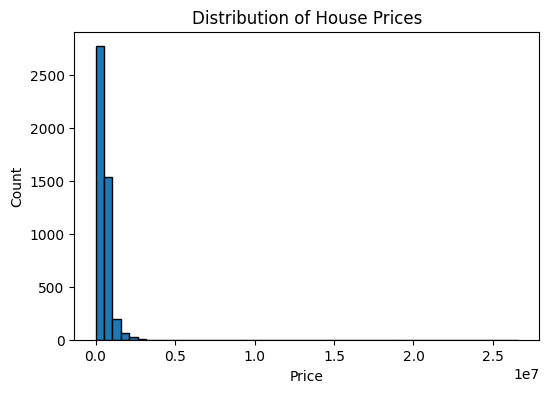

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["price"], bins=50, edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of House Prices")
plt.show()

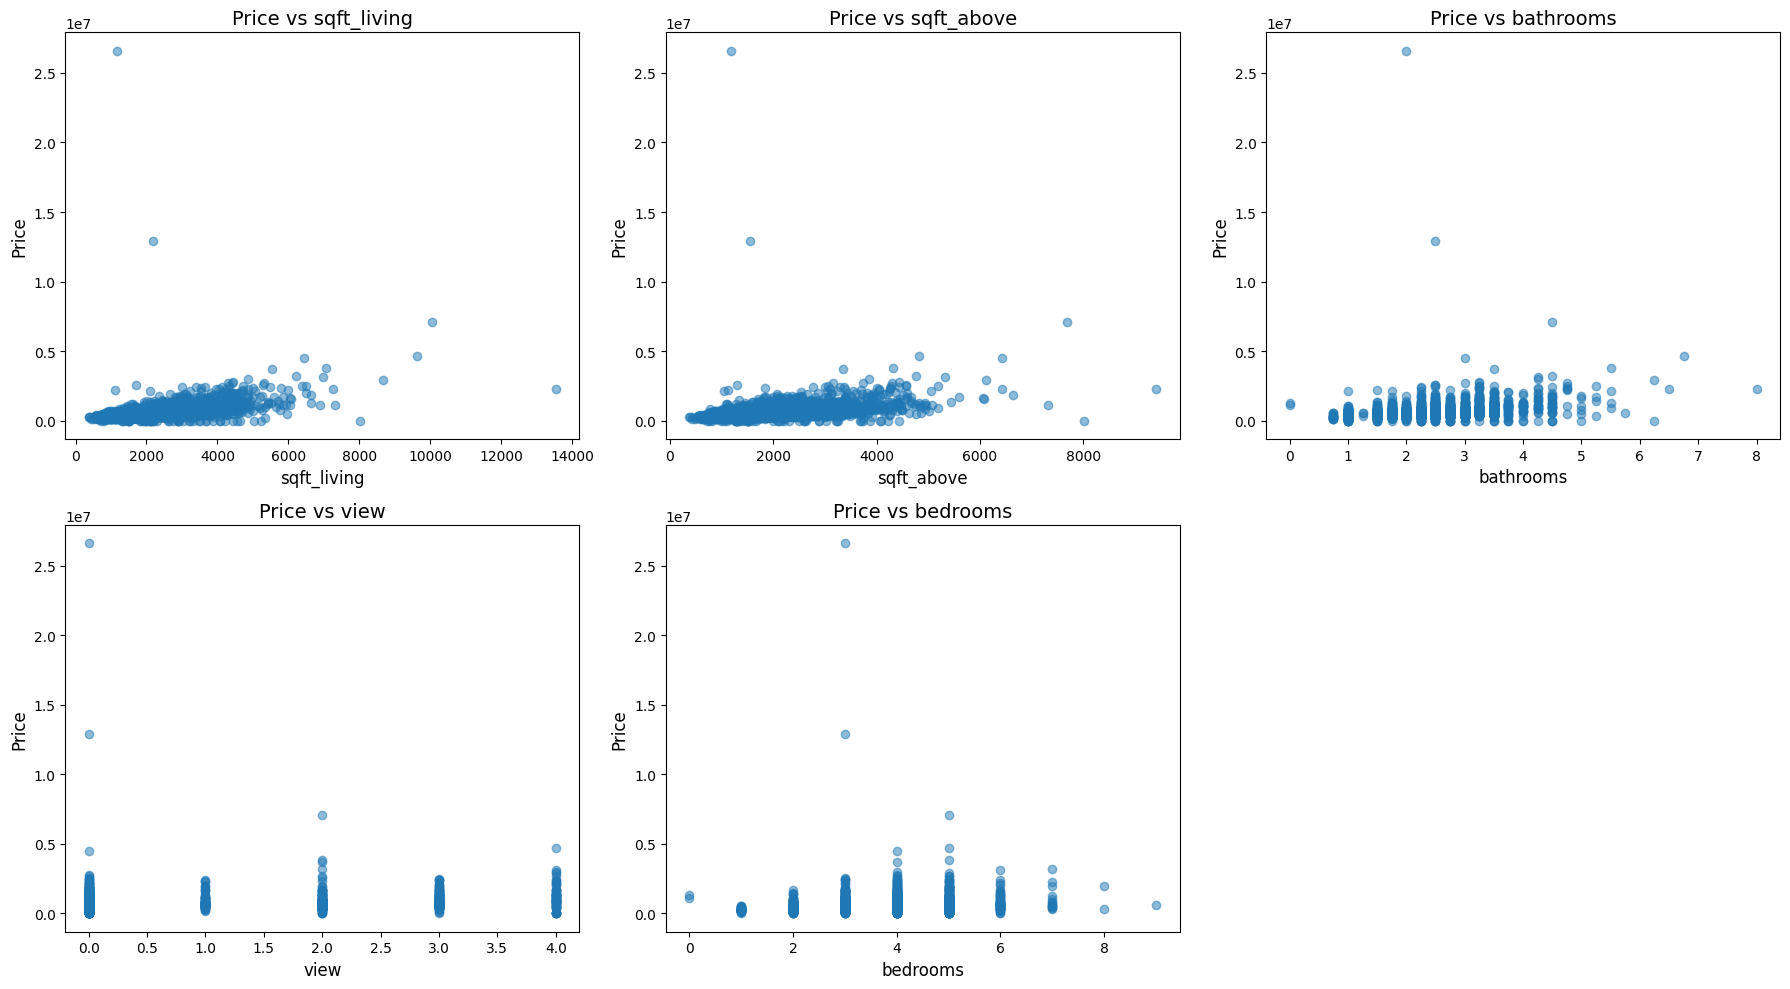

In [ ]:
# Scatter plots for top 5 correlated features vs Price

numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr()['price'].sort_values(ascending=False)
top_features = corr.drop("price").head(5).index

fig, axes = plt.subplots(2, 3, figsize=(18,10))  # 2 rows, 3 columns
axes = axes.flatten()

for i, feature in enumerate(top_features):
    axes[i].scatter(df[feature], df["price"], alpha=0.5)
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel("Price", fontsize=12)
    axes[i].set_title(f"Price vs {feature}", fontsize=14)

# Remove extra empty subplot
for j in range(len(top_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
#Correlation values for the remaining features
rest_features = corr.drop("price").drop(top_features)
print("📊 Correlation of remaining features with Price:\n")
print(rest_features)

📊 Correlation of remaining features with Price:

sqft_basement    0.328346
floors           0.257383
waterfront       0.198370
sqft_lot         0.083651
condition        0.058528
yr_built         0.027069
yr_renovated    -0.046615
Name: price, dtype: float64


“Among other features, bedrooms, floors, and waterfront presence show mild correlations with price, whereas lot size, condition, and year built have minimal impact. Interestingly, year renovated has almost no correlation, suggesting renovations alone do not strongly influence price in this dataset.

In [ ]:
# Correlation with target (price)
corr = numeric_df.corr()["price"].sort_values(ascending=False)
print(corr)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


**Strong predictors:** sqft_living (0.43), sqft_above (0.37), bathrooms (0.32)

**Moderate predictors:** view (0.23), sqft_basement (0.21), bedrooms (0.20)

**Weak or negligible predictors:** floors, waterfront, sqft_lot, condition, yr_built, yr_renovated


**Main takeaway:** House size (living area) has the strongest influence on price, while lot size, age, and renovations have very little effect.

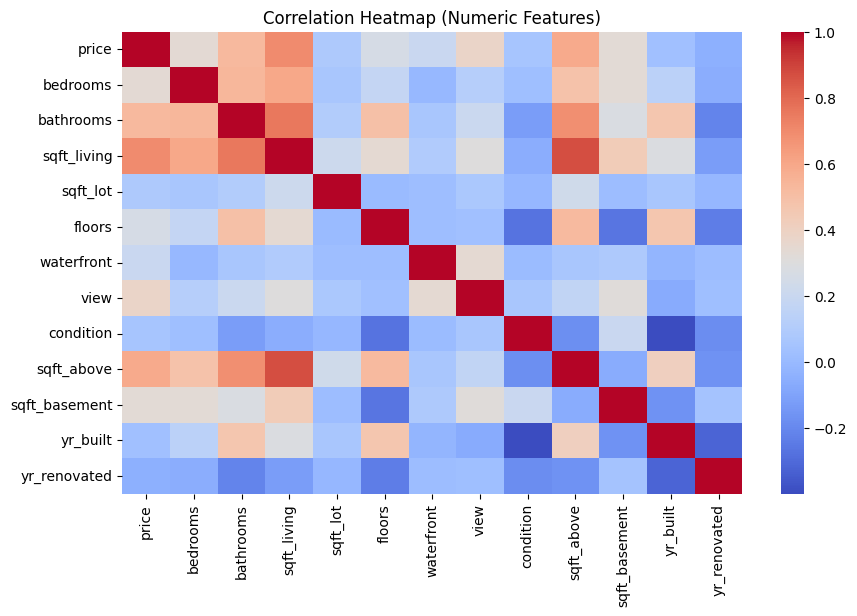

In [ ]:
# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
# Drop irrelevant / non-numeric features
df_clean = df.drop(["date", "street", "city", "statezip", "country"], axis=1)

print("Remaining columns after dropping:")
print(df_clean.columns)


Remaining columns after dropping:
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


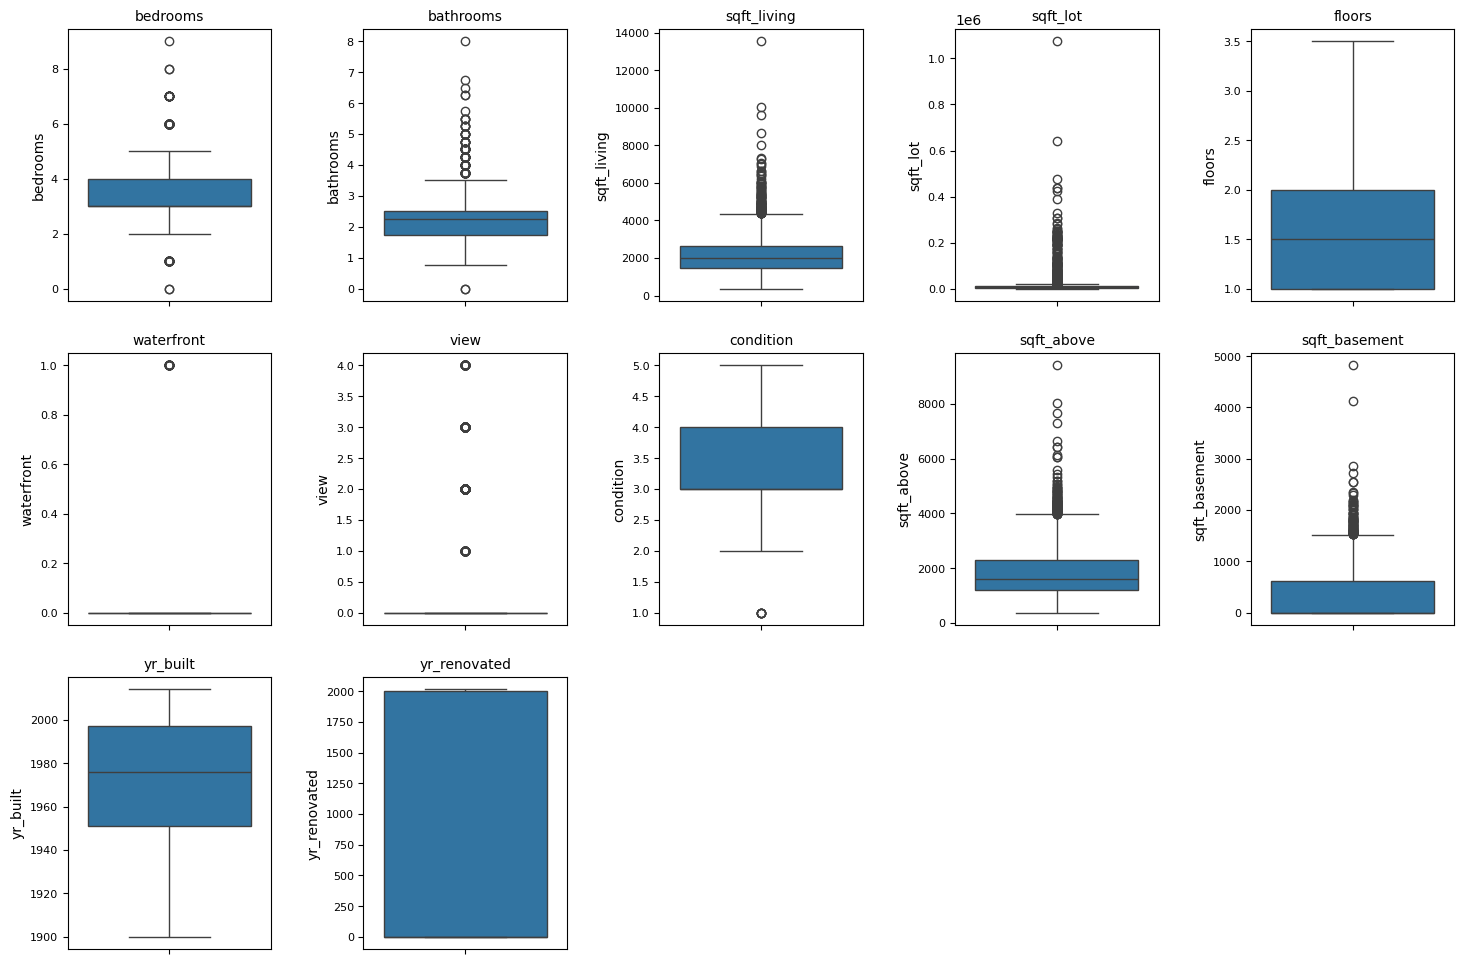

In [ ]:
# Boxplots for all numeric features
fig, axes = plt.subplots(3, 5, figsize=(15,10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove extra empty plots if any
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=2.0)  # add tighter layout with smaller gaps
plt.show()


In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# IQR method to detect outliers
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

# Count total outliers per column
outlier_counts = outliers.sum()
print("Outlier counts per column:\n", outlier_counts)


Outlier counts per column:
 price            240
bedrooms         118
bathrooms        141
sqft_living      129
sqft_lot         541
floors             0
waterfront        33
view             460
condition          6
sqft_above       116
sqft_basement     82
yr_built           0
yr_renovated       0
dtype: int64


Price, sqft_lot, and view have the **highest number of outliers.**

Bedrooms, bathrooms, and sqft_living **show moderate outliers.**

Floors, yr_built, and yr_renovated have **almost no outliers.**

Outliers in price and size-related features may represent **luxury or unusual properties**, so they should be handled carefully (log transformation or capping instead of blind removal)

In [ ]:
#drop only unrealistic values:
df_clean = df[
    (df['price'] > 0) & (df['price'] < 10000000) &
    (df['bedrooms'].between(1, 10)) &
    (df['bathrooms'].between(1, 10)) &
    (df['sqft_living'].between(100, 10000)) &
    (df['sqft_lot'].between(100, 1000000)) &
    (df['floors'].between(1, 3)) &
    (df['waterfront'].isin([0,1])) &
    (df['view'].between(0, 4)) &
    (df['condition'].between(1, 5)) &
    (df['sqft_above'] + df['sqft_basement'] == df['sqft_living'])
].copy()

print(f"Rows before cleaning: {len(df)}")
print(f"Rows after dropping unrealistic values: {len(df_clean)}")


Rows before cleaning: 4600
Rows after dropping unrealistic values: 4526


### Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (3620, 17)
Test set size: (906, 17)


In [ ]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

### Feature Scaling

In [ ]:
# Keep only numeric columns for features
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


### Model Training

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model on scaled numeric features and log-transformed target
model.fit(X_train_scaled, y_train_log)

LinearRegression()

### Prediction & Evaluation

In [ ]:
# Predict on scaled test features
y_pred_log = model.predict(X_test_scaled)

# Convert predictions back to original price scale
y_pred = np.expm1(y_pred_log)


In [ ]:
# Evaluate predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 95923826125.83
RMSE: 309715.72
MAE: 162415.47
R² Score: 0.25


### Visualization

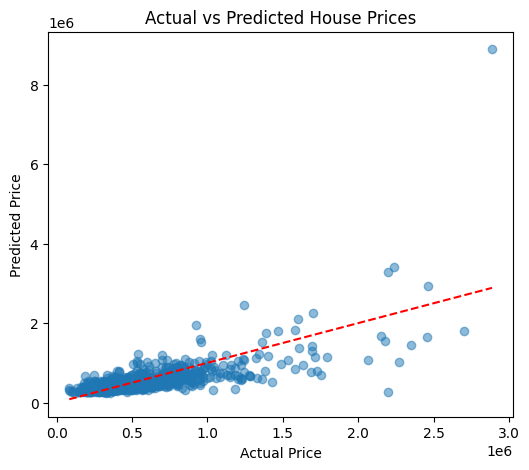

In [ ]:
#Diagnostic Plot
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

### Display model intercept and coefficients

In [ ]:
coeff_df = pd.DataFrame({
    "Feature": numeric_cols,
    "Coefficient": model.coef_
})
print(coeff_df)


          Feature  Coefficient
0        bedrooms    -0.052600
1       bathrooms     0.088212
2     sqft_living     0.165033
3        sqft_lot    -0.025302
4          floors     0.082733
5      waterfront     0.018380
6            view     0.052613
7       condition     0.046290
8      sqft_above     0.144054
9   sqft_basement     0.071356
10       yr_built    -0.110985
11   yr_renovated     0.010681


**Size-related features** (sqft_living, sqft_above) have the strongest influence on house price.

**Quality features** (view, condition, floors, bathrooms) moderately impact price.

**Age and layout** (yr_built, bedrooms, lot size) can slightly reduce price in the model

### Conclusion

The project predicts house prices using numeric features. After cleaning unrealistic values and exploring the data, we trained a Linear Regression model on scaled features with log-transformed prices. Key drivers of price are sqft_living, sqft_above, bathrooms, and floors. Model evaluation and visualizations show reasonable predictions, demonstrating a complete and interpretable predictive workflow.